In [207]:
import os, sys
import numpy as np
import pandas as pd
from joblib import dump, load
import matplotlib.pyplot as plt
from tqdm import tqdm
from importlib import reload
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

BASE_DIR = os.path.abspath("../")
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

from src import config, utils, image, clustering, main

custom_modules = [module for name, module in sys.modules.items() if name.startswith('src.')]

for custom_module in custom_modules:
    reload(custom_module)

In [209]:
main.get_kmeans_5_clusters_stats()
stats = pd.read_csv(config.selected_n_clusters_stats_path, index_col=False)
stats

,modis_point_x,modis_point_y,modis_class,coordinate_x,coordinate_y,sentinel_class_0_count,sentinel_class_1_count,sentinel_class_2_count,sentinel_class_3_count,sentinel_class_4_count,sentinel_majority_class
0,20,1,3,405443.965899,6.299807e+06,127,60,57,0,540,4
1,16,2,3,404343.060770,6.299532e+06,32,187,529,35,1,2
2,17,2,3,404618.287052,6.299532e+06,231,490,37,1,25,1
3,21,2,3,405719.192181,6.299532e+06,357,7,0,0,420,4
4,32,2,3,408746.681286,6.299532e+06,395,15,0,0,374,0
...,...,...,...,...,...,...,...,...,...,...,...
303,41,70,11,411223.717826,6.280816e+06,315,0,0,0,469,4
304,42,70,11,411498.944108,6.280816e+06,67,0,0,0,717,4
305,1,71,12,400214.666536,6.280541e+06,305,1,0,0,478,4
306,24,71,12,406544.871028,6.280541e+06,436,1,0,0,347,0


In [ ]:
%%time

main.get_kmeans_metrics()  # TODO запустить на ночь/на выходные

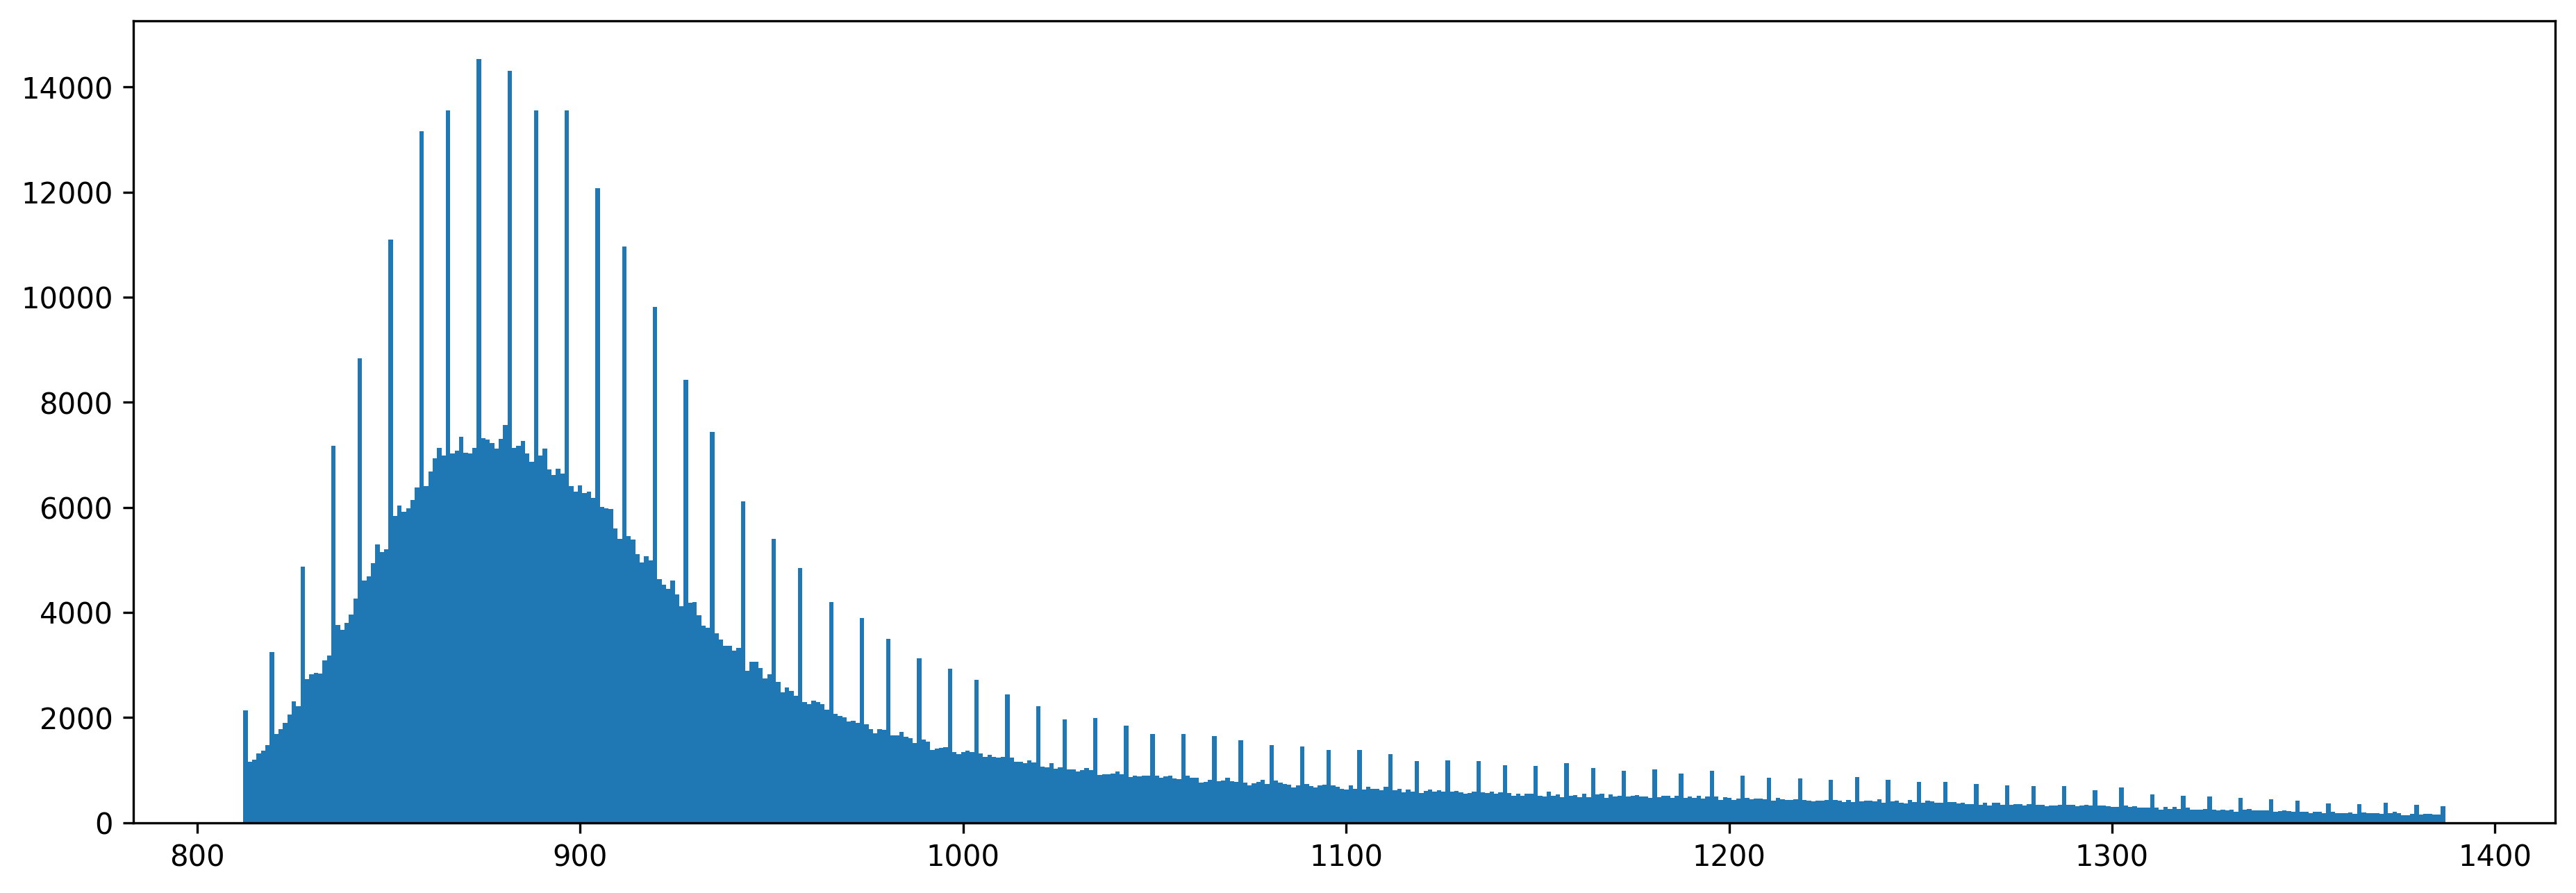

In [129]:
band = modis_data["Blue"]
right = band.quantile(q=0.99)
left = -(-band).quantile(.99)
plt.figure(figsize=(15,5), dpi=300)
plt.hist(band[left < band][band < right], bins=500)
plt.show()

# low to high resolution

In [1]:
import os
import numpy as np
import pandas as pd
from joblib import dump, load
from osgeo import gdal
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

SEED = 42

## sentinel, 10 meters resolution, blue, green, red, VNIR bands

### kmeans, 20 clusters


In [6]:
kmeans_backup_path = "data/backups/SENTINEL-2B_MSI_20210511_084252_kmeans_20_clusters_trained_on_Blue_Red_Green_VNIR.joblib"
labels_path = "data/SENTINEL-2B_MSI_20210511_084252_kmeans_20_clusters_labels_trained_on_Blue_Red_Green_VNIR.csv"
sample_img_path = os.path.join(img_dir, bands_filenames[0])
result_img_path = "data/images/high_resolution/results/SENTINEL-2B_MSI_20210511_084252_kmeans_20_clusters_labels_trained_on_Blue_Red_Green_VNIR.tif"

In [3]:
%%time

data = pd.read_csv(data_path, index_col=False)

CPU times: total: 59.1 s
Wall time: 1min 9s


In [4]:
modis_data

,Blue,Green,Red,VNIR
0,998,750,605,654
1,1008,746,612,682
2,1008,758,612,699
3,1016,748,610,703
4,1022,765,603,717
...,...,...,...,...
120560395,837,628,496,376
120560396,823,634,496,395
120560397,819,628,495,399
120560398,827,626,490,440


In [5]:
%%time

kmeans = KMeans(n_clusters=20, random_state=SEED).fit(data)

CPU times: total: 5h 19min 57s
Wall time: 5h 16min 55s


In [12]:
%%time

dump(kmeans, kmeans_backup_path)

CPU times: total: 453 ms
Wall time: 514 ms


['data/backups/SENTINEL-2B_MSI_20210511_084252_kmeans_trained_on_Blue_Red_Green_VNIR.joblib']

In [10]:
%%time

kmeans_20 = load(kmeans_backup_path)

CPU times: user 222 ms, sys: 510 ms, total: 732 ms
Wall time: 729 ms


In [8]:
kmeans_labels = pd.Series(kmeans.labels_)

In [9]:
kmeans_labels

0            3
1            3
2            3
3            3
4            3
            ..
120560395    9
120560396    9
120560397    9
120560398    9
120560399    9
Length: 120560400, dtype: int32

In [10]:
%%time

kmeans_labels.to_csv(labels_path, index=False)

CPU times: total: 1min 59s
Wall time: 2min 4s


In [11]:
%%time

kmeans_20_labels = pd.read_csv(labels_path, index_col=False)

CPU times: user 10.7 s, sys: 3.29 s, total: 14 s
Wall time: 14.1 s


In [4]:
%%time

kmeans_labels = np.array(kmeans_labels).ravel()

CPU times: total: 344 ms
Wall time: 361 ms


In [14]:
%%time

kmeans_labels, np.unique(kmeans_labels)

CPU times: total: 3.41 s
Wall time: 3.65 s


(array([3, 3, 3, ..., 9, 9, 9], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19], dtype=int64))

In [7]:
%%time

create_image(sample_img_path, result_img_path, kmeans_labels)

CPU times: total: 45.5 s
Wall time: 47.1 s


### kmeans, 10 clusters

In [14]:
kmeans_backup_path = "data/backups/SENTINEL-2B_MSI_20210511_084252_kmeans_10_clusters_trained_on_Blue_Red_Green_VNIR.joblib"
labels_path = "data/SENTINEL-2B_MSI_20210511_084252_kmeans_10_clusters_labels_trained_on_Blue_Red_Green_VNIR.csv"
sample_img_path = os.path.join(img_dir, bands_filenames[0])
result_img_path = "data/images/high_resolution/results/SENTINEL-2B_MSI_20210511_084252_kmeans_10_clusters_labels_trained_on_Blue_Red_Green_VNIR.tif"

In [23]:
%%time

data = pd.read_csv(data_path, index_col=False)

CPU times: user 41 s, sys: 22.3 s, total: 1min 3s
Wall time: 1min 4s


In [9]:
modis_data

,Blue,Green,Red,VNIR
0,998,750,605,654
1,1008,746,612,682
2,1008,758,612,699
3,1016,748,610,703
4,1022,765,603,717
...,...,...,...,...
120560395,837,628,496,376
120560396,823,634,496,395
120560397,819,628,495,399
120560398,827,626,490,440


In [10]:
%%time

kmeans = KMeans(n_clusters=10, random_state=SEED).fit(data)

CPU times: user 3h 30min 44s, sys: 9h 8min, total: 12h 38min 45s
Wall time: 28min 2s


In [7]:
%%time

dump(kmeans, kmeans_backup_path)

CPU times: total: 547 ms
Wall time: 2.94 s


['data/backups/SENTINEL-2B_MSI_20210511_084252_kmeans_10_clusters_trained_on_Blue_Red_Green_VNIR.joblib']

In [15]:
%%time

kmeans_10 = load(kmeans_backup_path)

CPU times: user 215 ms, sys: 1.05 s, total: 1.27 s
Wall time: 1.26 s


In [8]:
kmeans_labels = pd.Series(kmeans.labels_)

In [9]:
kmeans_labels

0            0
1            0
2            0
3            0
4            0
            ..
120560395    0
120560396    0
120560397    0
120560398    0
120560399    0
Length: 120560400, dtype: int32

In [10]:
%%time

kmeans_labels.to_csv(labels_path, index=False)

CPU times: total: 1min 45s
Wall time: 1min 47s


In [16]:
%%time

kmeans_10_labels = pd.read_csv(labels_path, index_col=False)

CPU times: user 8.85 s, sys: 3.94 s, total: 12.8 s
Wall time: 13 s


In [5]:
%%time

kmeans_labels = np.array(kmeans_labels).ravel()

CPU times: total: 562 ms
Wall time: 600 ms


In [6]:
%%time

kmeans_labels, np.unique(kmeans_labels)

CPU times: total: 4.16 s
Wall time: 4.44 s


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64))

In [15]:
%%time

create_image(sample_img_path, result_img_path, kmeans_labels)

CPU times: total: 55.5 s
Wall time: 1min 2s


### metrics

In [29]:
kmeans_20_labels = kmeans_20_labels.values.ravel()
kmeans_10_labels = kmeans_10_labels.values.ravel()

In [30]:
print(kmeans_20.inertia_)
print(kmeans_10.inertia_)

3422984021885.875
6534904673580.018


In [33]:
%%time

silhouette_coef_kmeans_20 = silhouette_score(data, kmeans_20_labels, metric='euclidean')

KeyboardInterrupt: 

In [ ]:
%%time

silhouette_coef_kmeans_10 = silhouette_score(data, kmeans_10_labels, metric='euclidean')

In [ ]:
print(silhouette_coef_kmeans_20)
print(silhouette_coef_kmeans_10)

In [ ]:
%%time

calinski_harabasz_index_kmeans_20 = calinski_harabasz_score(data, kmeans_20_labels)

In [ ]:
%%time

calinski_harabasz_index_kmeans_10 = calinski_harabasz_score(data, kmeans_10_labels)

In [ ]:
print(calinski_harabasz_index_kmeans_20)
print(calinski_harabasz_index_kmeans_10)

In [ ]:
%%time

davies_bouldin_index_kmeans_20 = davies_bouldin_score(data, kmeans_20_labels)

In [ ]:
%%time

davies_bouldin_index_kmeans_10 = davies_bouldin_score(data, kmeans_10_labels)

In [ ]:
print(davies_bouldin_index_kmeans_20)
print(davies_bouldin_index_kmeans_10)